## Police Shootings
This data was collected by the Washington Post. The Post is documenting only those shootings in which a police officer, in the line of duty, shot and killed a civilian — the circumstances that most closely parallel the 2014 killing of Michael Brown in Ferguson, Mo., which began the protest movement culminating in Black Lives Matter and an increased focus on police accountability nationwide. The Post is not tracking deaths of people in police custody, fatal shootings by off-duty officers or non-shooting deaths. Last updated with data from July 21, 2020

In [1]:
# Import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import branca.colormap as cmp 
import json
import requests

In [2]:
path = "populationByState/" #Collection of population by state
data = pd.read_csv('fatal-police-shootings-data.csv') #Washington Post police shooting data 2015 - 2020
data.set_index('id',inplace=True) #set data index value to id number set by WaPo
data['race']=data['race'].fillna('Undefined')

totalPop = pd.read_csv('us2010_19population.csv',skiprows = 3) #Total national population from 2010 - 2019 by US census
totalPop = totalPop.drop(columns=['2010','2011','2012','2013','2014']) #Trim columns to total population from 2015 - 2019
totalPop = totalPop[0:35] #Simplifying data by using Total Population
data #display total US population

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,,,
3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,Julio Jaramillo,2020-07-14,shot,gun,28.0,M,H,Deming,NM,False,attack,Foot,False
5996,Timothy O'Shea,2020-07-14,shot,toy weapon,24.0,M,Undefined,Morris Township,NJ,True,attack,Not fleeing,False
5993,TK TK,2020-07-15,shot,vehicle,39.0,M,Undefined,Stockton,CA,False,other,Not fleeing,False


In [12]:
# Print values for certain columns in the WaPo data
print(data.gender.value_counts())
print(data.race.value_counts())
print(data.signs_of_mental_illness.value_counts())
print(data.state.value_counts())
print(data.threat_level.value_counts())
print(data.body_camera.value_counts())

M    5231
F     243
Name: gender, dtype: int64
W            2498
B            1302
H             910
Undefined     545
A              94
N              78
O              48
Name: race, dtype: int64
False    4251
True     1224
Name: signs_of_mental_illness, dtype: int64
CA    808
TX    486
FL    356
AZ    256
CO    201
GA    186
OK    165
OH    157
NC    154
WA    153
TN    144
MO    143
PA    111
LA    110
NM    106
IL    104
AL    104
NY    102
NV     98
IN     97
KY     97
VA     95
WI     93
SC     89
OR     87
AR     83
MI     80
MD     79
NJ     69
MS     65
MN     61
UT     61
WV     54
KS     50
ID     42
AK     39
MA     35
MT     33
IA     31
HI     30
NE     24
ME     22
CT     21
SD     17
WY     14
DE     13
NH     13
DC     13
ND     11
VT      9
RI      4
Name: state, dtype: int64
attack          3538
other           1693
undetermined     244
Name: threat_level, dtype: int64
False    4837
True      638
Name: body_camera, dtype: int64


In [13]:
# Summarize US population data
# T = total W=White B=Black H=Hispanic(White) I = indigenous A = Asian
totalPopT = totalPop[0:1]['2018']
totalPopW = totalPop[2:3]['2018']
totalPopB = totalPop[3:4]['2018']
totalPopH = totalPop[30:31]['2018']
totalPopI = totalPop[4:5]['2018']
totalPopA = totalPop[5:6]['2018']

# Remove comma delimited numbers and convert to integer
totalPopT=pd.to_numeric(totalPopT.str.replace(',',''), errors='coerce')
totalPopW=pd.to_numeric(totalPopW.str.replace(',',''), errors='coerce')
totalPopB=pd.to_numeric(totalPopB.str.replace(',',''), errors='coerce')
totalPopH=pd.to_numeric(totalPopH.str.replace(',',''), errors='coerce')
totalPopI=pd.to_numeric(totalPopI.str.replace(',',''), errors='coerce')
totalPopA=pd.to_numeric(totalPopA.str.replace(',',''), errors='coerce')

# Subtract total population White by Hispanics
totalPopW = totalPopW.values - totalPopH.values
totalPop

,Unnamed: 0,Census,Estimates Base,2015,2016,2017,2018,2019
0,TOTAL POPULATION,"308,745,538","308,758,105","320,635,163","322,941,311","324,985,539","326,687,501","328,239,523"
1,.One Race:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,..White,"241,937,061","241,945,431","247,382,690","248,413,058","249,270,773","249,961,025","250,522,190"
3,..Black or African American,"40,250,635","40,254,450","42,532,491","42,970,183","43,374,142","43,732,024","44,075,086"
4,..American Indian and Alaska Native,"3,739,506","3,739,607","4,004,358","4,054,740","4,101,605","4,145,811","4,188,092"
5,..Asian,"15,159,516","15,159,643","17,752,744","18,279,949","18,764,237","19,134,105","19,504,862"
6,..Native Hawaiian and Other Pacific Islander,"674,625","674,644","750,159","765,814","780,316","793,787","806,937"
7,.Two or More Races,"6,984,195","6,984,330","8,212,721","8,457,567","8,694,466","8,920,749","9,142,356"
8,.Race Alone or in Combination:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,..White,"248,067,530","248,075,996","254,647,109","255,903,271","256,979,842","257,879,857","258,646,488"


In [5]:
# Taking ratio of specified ethnicity/racial population to total
perW=totalPopW/totalPopT.values*100
perB=totalPopB.values/totalPopT.values*100
perH=totalPopH.values/totalPopT.values*100
perI=totalPopI.values/totalPopT.values*100
perA=totalPopA.values/totalPopT.values*100

In [6]:
shotByRace = data.race.value_counts()
# Taking ratio of specified ethnicity killed by police to total killed by police
perShotW=shotByRace['W']/shotByRace.sum()
perShotB=shotByRace['B']/shotByRace.sum()
perShotH=shotByRace['H']/shotByRace.sum()
perShotI=shotByRace['N']/shotByRace.sum()
perShotA=shotByRace['A']/shotByRace.sum()
perShotO=shotByRace['O']/shotByRace.sum()
perShotU=shotByRace['Undefined']/shotByRace.sum()

In [7]:
# Change format of the date column of WaPo data
data['date']=pd.to_datetime(data['date'],format='%Y-%m-%d')

year15 = data[data["date"] < '2016-01-01']
year16 = data.loc[(data['date'] > '2016-01-01') & (data['date'] < '2017-01-01')]
year17 = data.loc[(data['date'] > '2017-01-01') & (data['date'] < '2018-01-01')]
year18 = data.loc[(data['date'] > '2018-01-01') & (data['date'] < '2019-01-01')]
year19 = data.loc[(data['date'] > '2019-01-01') & (data['date'] < '2020-01-01')]
year20 = data[data["date"] > '2020-01-01']


In [8]:
# Killings per year up to 2019
year15len = len(year15.index)
year16len = len(year16.index)
year17len = len(year17.index)
year18len = len(year18.index)
year19len = len(year19.index)
year20len = len(year20.index)

killByYear = [(2015,year15len),(2016,year16len),(2017,year17len),(2018,year18len),
             (2019,year19len)]

[994, 961, 980, 987, 997]


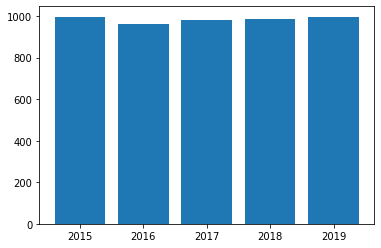

In [9]:
# Looking at killings by police for last 5 years
x_val = [x[0] for x in killByYear]
y_val = [x[1] for x in killByYear]


plt.bar(x_val,y_val)

print(y_val)

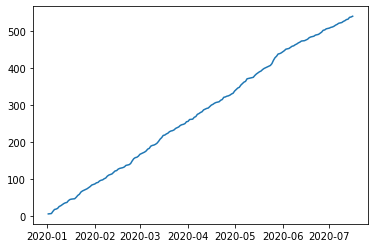

In [14]:
# Looking at killings by police for 2020
x_val = year20['date'].unique()
y_val = year20['date'].value_counts().sort_index().to_list()
y_val2 = np.cumsum(y_val)
figsize = (20,20)
plt.plot(x_val,y_val2)

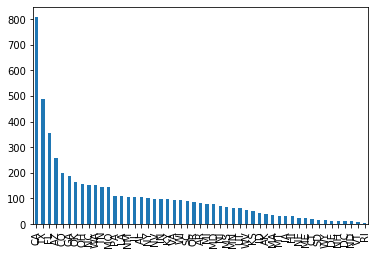

In [15]:
# Killings of police by state for past 5.5 years
stateCount=data.state.value_counts()
stateCount.plot.bar()

([<matplotlib.patches.Wedge at 0x7f8abd2af450>,
 [Text(0.1506940495473667, 1.0896289751245678, 'W'),
  Text(-0.9796052361165309, -0.5003734419142124, 'B'),
  Text(0.1868675317590301, -1.084011312475238, 'H'),
  Text(0.7397883309293702, -0.8140720026021881, 'I'),
  Text(0.8164025309767139, -0.7372156451234713, 'A'),
  Text(0.8736962595347579, -0.6683224117706761, 'O'),
  Text(1.0466486782026272, -0.33841770700820867, 'U')])

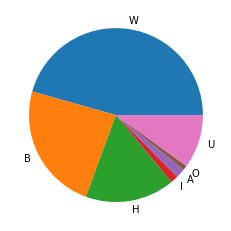

In [16]:
# Looking at percent killings by race and ethnicity
perShotAll=[perShotW,perShotB,perShotH,perShotI,perShotA,perShotO,perShotU]
perShotAll2=[perShotW,perShotB,perShotH,perShotI,perShotA]

plt.pie(perShotAll, labels = ['W','B','H','I','A','O','U'])

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.patches.Wedge at 0x7f8abd34bc90>,
 [Text(-0.4151745642096525, 1.0186412917378351, 'W'),
  Text(-0.3909133548139029, -1.0281958709448993, 'B'),
  Text(0.61174735255795, -0.9142019342783844, 'H'),
  Text(1.0042295919078184, -0.44891305030780354, 'I'),
  Text(1.0802789080398512, -0.207358339220363, 'A')])

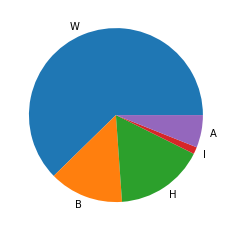

In [17]:
# Looking at percent population in US for 2018
perPop=[perW,perB,perH,perI,perA]
plt.pie(perPop,labels = ['W','B','H','I','A'])

In [18]:
# Population killed with repect to total population
perShotPopW=shotByRace['W']/totalPopW*100
perShotPopB=shotByRace['B']/totalPopB.values*100
perShotPopH=shotByRace['H']/totalPopH.values*100
perShotPopI=shotByRace['N']/totalPopI.values*100
perShotPopA=shotByRace['A']/totalPopA.values*100
perShotPopLst = [perShotPopW,perShotPopB,perShotPopH,perShotPopI,perShotPopA]
perShotPopLst

[array([0.00126458]),
 array([0.00297722]),
 array([0.00173579]),
 array([0.00188142]),
 array([0.00049127])]

[array([0.15144219]), array([0.35654171]), array([0.20787156]), array([0.22531186]), array([0.05883268])]


/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


([<matplotlib.patches.Wedge at 0x7f8abd3ad550>,
 [Text(0.9778345114916974, 0.5038250372260132, 'W'),
  Text(-0.5281902197273876, 0.9648912331368412, 'B'),
  Text(-0.8390458290555904, -0.7113382435553547, 'H'),
  Text(0.5208901102824112, -0.9688516362219645, 'I'),
  Text(1.0812646064167515, -0.20215551169935428, 'A')])

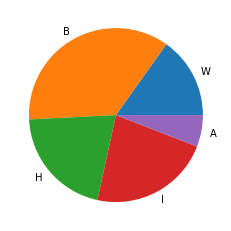

In [19]:
# Normalized shot population by ethnicity
perShotPopLstNorm = []

for i in range(len(perShotPopLst)): 
    x = abs(perShotPopLst[i]/sum(perShotPopLst))
    perShotPopLstNorm.append(x)

print(perShotPopLstNorm)
plt.pie(perShotPopLstNorm,labels = ['W','B','H','I','A'])    

In [20]:
# Call on URL to access folium map
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'        #for state level 


In [62]:
# Create a linear color bar
linear = cmp.LinearColormap(
    ['yellow','darkgreen','blue', 'purple','red'],
    vmin=4, vmax=808,
    caption='Police Shootings By State' 
)


In [63]:
# Use the previously created value_counts output to create a pandas dataframe
# This allows you to call on index and create a dictionary to plot on the map
byState = pd.DataFrame({'State':stateCount.index, 'Killings':stateCount.values})
byState_dict=byState.set_index('State')['Killings']
geo_json_data = json.loads(requests.get(state_geo).text)

usa_linear = folium.Map([48,-102], tiles='cartodbpositron', zoom_start=3)

mymap=folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': linear(byState_dict[feature['id']]),
        'color': 'black',     #border color for the color fills
        'weight': 1,          #how thick the border has to be
        #'dashArray': '5, 3'  #dashed lines length,space between them
    }
).add_to(usa_linear)
linear.add_to(usa_linear)   #adds colorscale or legend



usa_linear

In [38]:
# Example chloropleth map, Color bar generated is not linear
usa_state = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(
    geo_data = state_geo,                  
    name ='choropleth',                  
    data = stateCount,                     
    columns = ['State', 'Shootings'], #columns to work on
    key_on ='feature.id',
    #threshold_scale = myscale,
    fill_color ='YlGn',     
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "Police Shootings for past 5 years"
).add_to(usa_state)

usa_state